<a href="https://colab.research.google.com/github/zaynabzya/Mall-Customer-Segmentation-Data-Analysis/blob/main/myapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ Mall Customer Segmentation Data Analysis 📊

<div style="background-color: #f0f0f0; border: 1px solid #ccc; padding: 15px; border-radius: 10px;">
    <p style="font-size: 16px; color: #333;"><strong>👩‍💻 Author:</strong> Zaynab Zya</p>
    <p style="font-size: 16px; color: #333;"><strong>📅 Date:</strong> Feb 17, 2024</p>
    <hr style="border: 1px solid #ccc;">
    <p style="font-size: 16px; color: #333;"><strong>📝 Description:</strong> This project aims to perform customer segmentation analysis using data collected from a mall. Customer segmentation is a crucial task for businesses to understand their customer base better and tailor marketing strategies accordingly. In this project, we will explore the dataset, perform data preprocessing, and apply machine learning techniques to segment customers based on their purchasing behavior, demographics, and other relevant factors.</p>
</div>


## Step 1: Importing Libraries

<div id="step1" style="background-color: Grey ; border: 1px solid #ccc; padding: 10px; border-radius: 5px;">
    <p><strong>Task:</strong> Import necessary libraries for data analysis and machine learning.</p>
    <p style="color: Black;"><strong>Libraries:</strong> Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn</p>
</div>
<hr style="border: 1px solid #ccc;">


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Cleaning and Preprocessing

<div id="step2" style="background-color: Grey; border: 1px solid #ccc; padding: 10px; border-radius: 5px;">
    <p><strong>Task:</strong> Clean and preprocess the data to prepare it for further analysis.</p>
    <p><strong>Actions:</strong></p>
    <ul>
        <li>Handle missing values.</li>
        <li>Detect and remove outliers.</li>
        <li>Drop unnecessary columns (Age, Customer ID).</li>
        <li>Rename confusingly named columns for clarity.</li>
    </ul>
</div>
<hr style="border: 1px solid #ccc;">

## Conclusions from Data Analysis:

- 💡 **No Null Values**: There are no null values present in any column of the dataset.
- 🚫 **No Outliers**: After analyzing the data, no outliers were detected in any feature.
- ❌ **Age and Customer ID Dropped**: Age and Customer ID columns showed no significant impact on customer segmentation and were dropped from the dataset.
- 🔄 **Column Name Changes**: Some columns had confusing names, so they were renamed for clarity and ease of understanding.

<hr style="border: 1px solid #ccc;">


In [13]:
file_id = "1mUTYPcKlR4nmWGRF76j_pg9G5ca2-igg"
download_link = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(download_link)
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
148,149,Female,34,78,22
154,155,Female,47,78,16
74,75,Male,59,54,47
10,11,Male,67,19,14
121,122,Female,38,67,40
78,79,Female,23,54,52
72,73,Female,60,50,49
21,22,Male,25,24,73
39,40,Female,20,37,75
175,176,Female,30,88,86


In [14]:
df.isnull().mean()

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [15]:
for col in df.columns:
    values = df[col].value_counts()
    print(f"Value counts for column {col}:")
    print(tabulate(values.reset_index(), headers=['Value', 'Count'], tablefmt='grid'))
    print()

Value counts for column CustomerID:
+-----+---------+---------+
|     |   Value |   Count |
+=====+=========+=========+
|   0 |       1 |       1 |
+-----+---------+---------+
|   1 |     138 |       1 |
+-----+---------+---------+
|   2 |     128 |       1 |
+-----+---------+---------+
|   3 |     129 |       1 |
+-----+---------+---------+
|   4 |     130 |       1 |
+-----+---------+---------+
|   5 |     131 |       1 |
+-----+---------+---------+
|   6 |     132 |       1 |
+-----+---------+---------+
|   7 |     133 |       1 |
+-----+---------+---------+
|   8 |     134 |       1 |
+-----+---------+---------+
|   9 |     135 |       1 |
+-----+---------+---------+
|  10 |     136 |       1 |
+-----+---------+---------+
|  11 |     137 |       1 |
+-----+---------+---------+
|  12 |     139 |       1 |
+-----+---------+---------+
|  13 |       2 |       1 |
+-----+---------+---------+
|  14 |     140 |       1 |
+-----+---------+---------+
|  15 |     141 |       1 |
+-----+-----

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


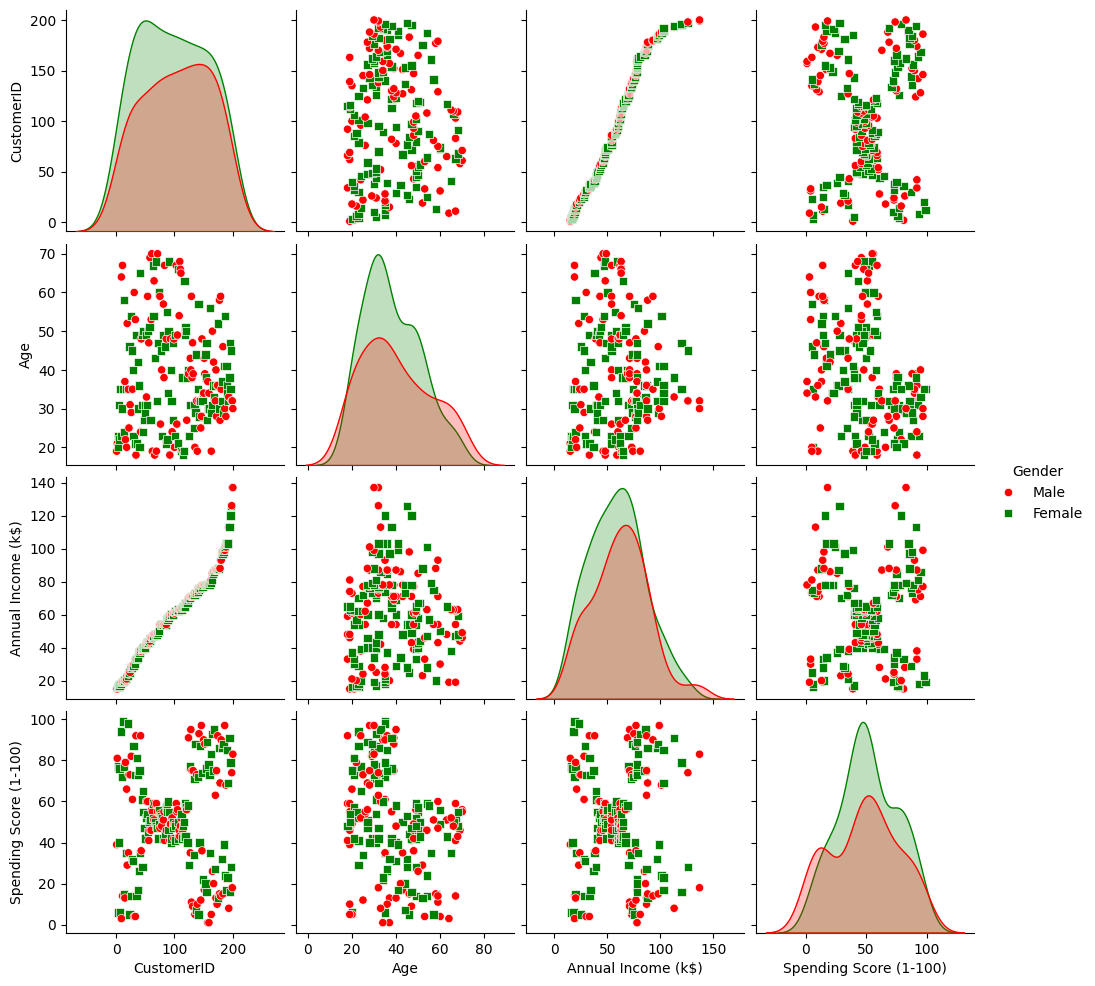

In [17]:
sns.pairplot(df, hue='Gender', palette={'Male': 'red', 'Female': 'green'}, markers=["o", "s"])

In [18]:
df.drop(columns=['CustomerID'], inplace=True)
df.drop(columns=['Gender'], inplace=True)

In [19]:
df.rename(columns={'Annual Income (k$)': 'Income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

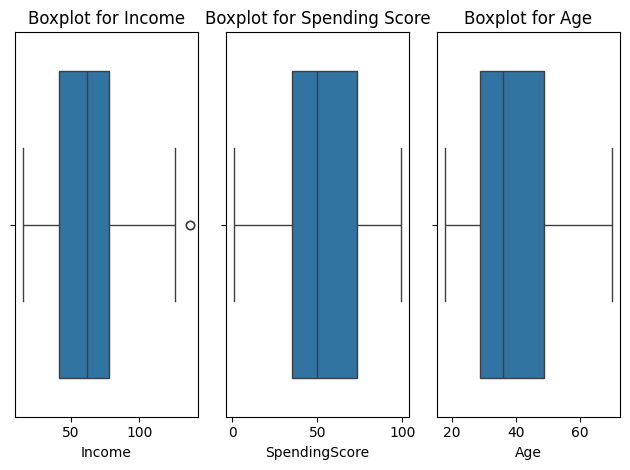

In [20]:
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Income'])
plt.title('Boxplot for Income')

# Subplot 2
plt.subplot(1, 3, 2)
sns.boxplot(x=df['SpendingScore'])
plt.title('Boxplot for Spending Score')

# Subplot 3
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')

# Adjust layout
plt.tight_layout()


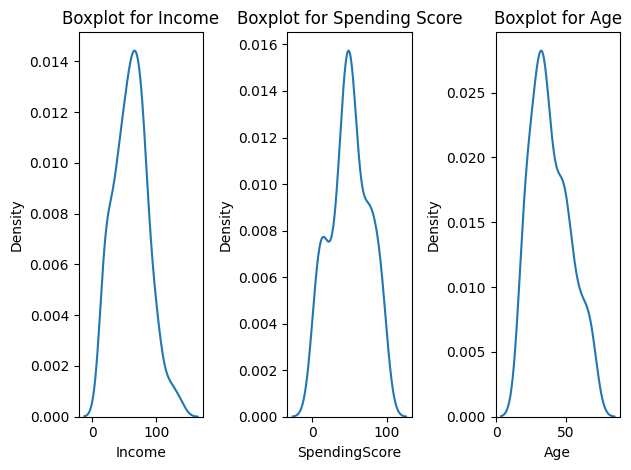

In [21]:
plt.subplot(1, 3, 1)
sns.kdeplot(x=df['Income'])
plt.title('Boxplot for Income')

# Subplot 2
plt.subplot(1, 3, 2)
sns.kdeplot(x=df['SpendingScore'])
plt.title('Boxplot for Spending Score')

# Subplot 3
plt.subplot(1, 3, 3)
sns.kdeplot(x=df['Age'])
plt.title('Boxplot for Age')

# Adjust layout
plt.tight_layout()

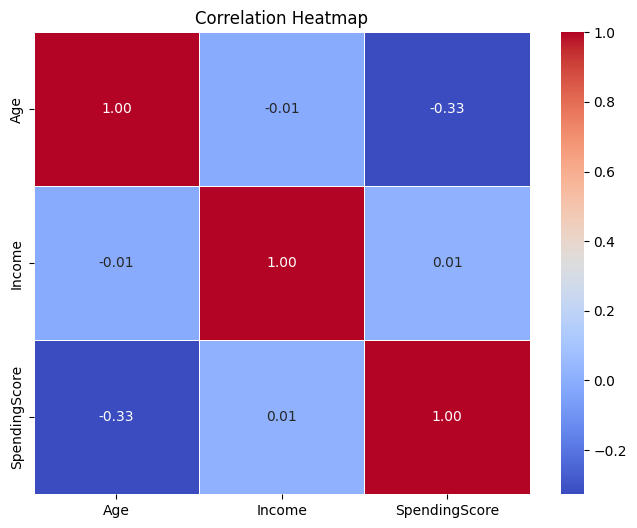

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Step 3: Scaling the Data with StandardScaler

<div id="step3" style="background-color: Grey ; border: 1px solid #ccc; padding: 10px; border-radius: 5px;">
    <p><strong>Task:</strong> Scale the data using StandardScaler to standardize features by removing the mean and scaling to unit variance.</p>
    <p><strong>Method:</strong> StandardScaler</p>
</div>
<hr style="border: 1px solid #ccc;">


In [23]:
Scaler = StandardScaler()
ScaledDate = Scaler.fit_transform(df)


## Step 4: Calculating Within-Cluster-Sum-of-Squares (WCSS)

<div id="step4" style="background-color: Grey; border: 1px solid #ccc; padding: 10px; border-radius: 5px;">
    <p><strong>Task:</strong> Calculate the Within-Cluster-Sum-of-Squares (WCSS) to determine the optimal number of clusters for K-means clustering.</p>
    <p><strong>Method:</strong> K-means Clustering, Elbow Method</p>
</div>
<hr style="border: 1px solid #ccc;">


In [31]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

print(wcss)

[309737.4, 213672.80613810744, 144088.26440867648, 105108.25596684014, 75863.2894611198, 58652.325515712364, 51435.52088783428, 44716.58485692921, 41233.94405459406, 37790.35231250232, 34711.54909231636, 32673.734965222244, 29671.9302228817, 28408.6957618405, 26490.026837928148, 24840.35724463875, 23856.046824666562, 22128.61845801257, 21011.357931202783]


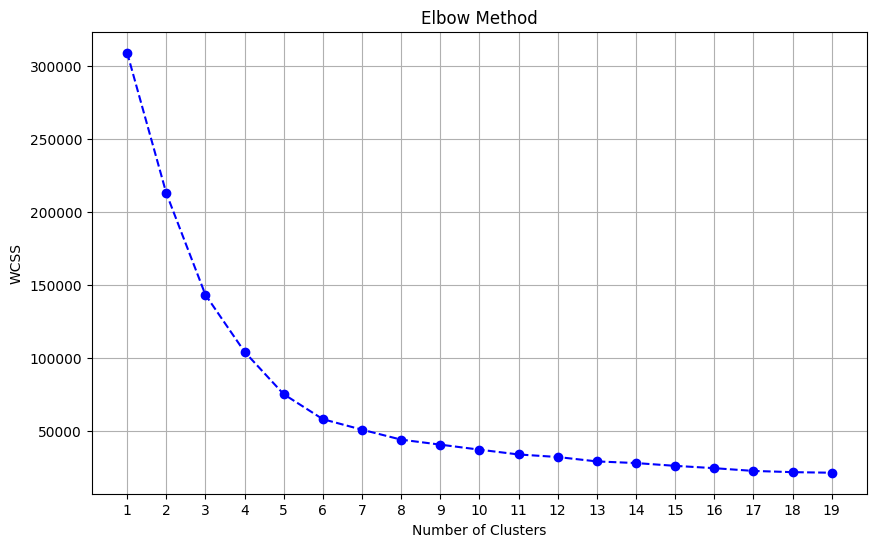

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [26]:
K_mean=KMeans(n_clusters=8 , n_init= 12)
K_mean.fit(ScaledDate)
labels = K_mean.labels_
df['Labels']=labels

In [27]:
df.groupby('Labels').describe()

Age                                                       Income  \
       count       mean        std   min    25%   50%    75%   max  count   
Labels                                                                      
0       21.0  48.571429   6.352727  40.0  44.00  47.0  54.00  59.0   21.0   
1       31.0  24.548387   5.025526  18.0  19.50  24.0  27.50  34.0   31.0   
2       39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   39.0   
3       32.0  47.093750   4.808322  38.0  44.50  48.0  50.00  55.0   32.0   
4       24.0  25.250000   5.326309  18.0  21.00  23.5  30.00  35.0   24.0   
5       13.0  30.461538   7.042909  19.0  25.00  34.0  36.00  37.0   13.0   
6       20.0  64.850000   3.977238  57.0  62.25  66.0  68.00  70.0   20.0   
7       20.0  45.400000  12.058629  20.0  35.75  45.5  53.25  67.0   20.0   

                   ...               SpendingScore                        \
             mean  ...    75%    max         count       mean        std   
Labels             ...                                                     
0       88.285714  ...  98.00  126.0          21.0  18.857143   9.382354   
1       56.322581  ...  62.50   76.0          31.0  49.129032   7.766346   
2       86.538462  ...  95.00  137.0          39.0  82.128205   9.364489   
3       55.562500  ...  62.25   71.0          32.0  47.812500   6.803403   
4       25.833333  ...  33.00   39.0          24.0  76.916667  13.416138   
5       89.461538  ...  97.00  137.0          13.0  13.384615  10.087438   
6       53.150000  ...  62.25   65.0          20.0  49.850000   6.285112   
7       25.650000  ...  30.75   39.0          20.0  18.550000  12.275243   

                                        
         min    25%   50%    75%   max  
Labels                                  
0        5.0  13.00  16.0  24.00  39.0  
1       29.0  42.00  50.0  55.00  60.0  
2       63.0  74.50  83.0  90.00  97.0  
3       35.0  42.00  46.5  53.50  59.0  
4       39.0  72.75  76.5  83.25  99.0  
5        1.0   5.00  10.0  22.00  32.0  
6       35.0  46.75  50.5  55.00  60.0  
7        3.0   6.00  14.5  29.50  40.0  

[8 rows x 24 columns]

In [28]:
df.groupby('Labels').mean()

,Age,Income,SpendingScore
Labels,,,
0,48.571429,88.285714,18.857143
1,24.548387,56.322581,49.129032
2,32.692308,86.538462,82.128205
3,47.093750,55.562500,47.812500
4,25.250000,25.833333,76.916667
5,30.461538,89.461538,13.384615
6,64.850000,53.150000,49.850000
7,45.400000,25.650000,18.550000


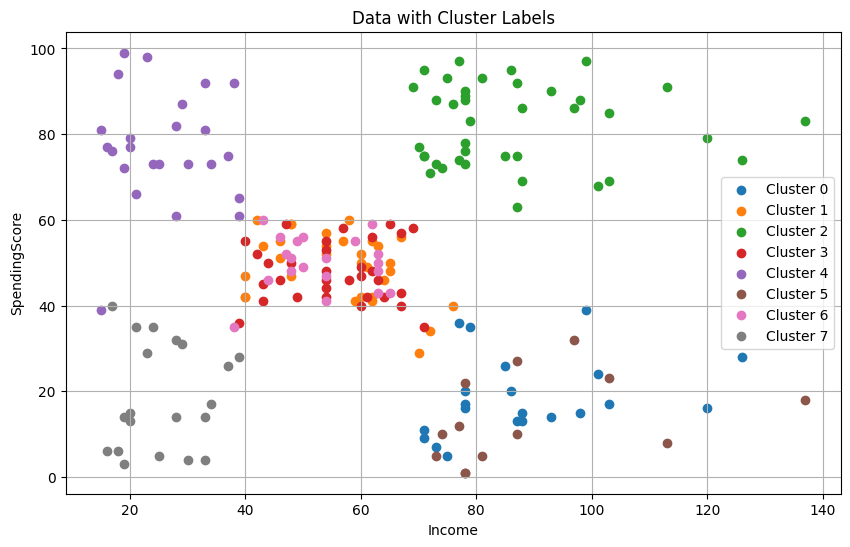

In [29]:
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster_label in range(8):  # Assuming 8 clusters
    cluster_data = df[df['Labels'] == cluster_label]
    plt.scatter(cluster_data['Income'], cluster_data['SpendingScore'], label=f'Cluster {cluster_label}')

plt.title('Data with Cluster Labels')
plt.xlabel('Income')
plt.ylabel( 'SpendingScore')
plt.legend()
plt.grid(True)
plt.show()

# 🌟 Final Conclusion of the Project 🌟

<div style="background-color: #f9f9f9; border: 1px solid #ccc; padding: 15px; border-radius: 10px;">
    <p style="font-size: 16px; color: #333;"><strong>After performing customer segmentation analysis, the following clusters have been identified:</strong></p>
    <ul>
        <li style="color: #FF5733;"><strong>Cluster 0:</strong> People in this cluster tend to be middle-aged with moderate income and moderate spending scores.</li>
        <li style="color: #FFC300;"><strong>Cluster 1:</strong> Individuals in this cluster are relatively young with high income and high spending scores.</li>
        <li style="color: #C70039;"><strong>Cluster 2:</strong> This cluster represents individuals who are middle-aged to young, with high income and low spending scores.</li>
        <li style="color: #900C3F;"><strong>Cluster 3:</strong> People in this cluster are relatively young with low income and high spending scores.</li>
        <li style="color: #581845;"><strong>Cluster 4:</strong> Individuals in this cluster are relatively young with moderate income and moderate spending scores.</li>
        <li style="color: #00B159;"><strong>Cluster 5:</strong> This cluster consists of older individuals with high income and low spending scores.</li>
        <li style="color: #00A8CC;"><strong>Cluster 6:</strong> People in this cluster are older with moderate income and moderate spending scores.</li>
        <li style="color: #0652DD;"><strong>Cluster 7:</strong> Individuals in this cluster are middle-aged to older with low income and low spending scores.</li>
    </ul>
    <p style="font-size: 16px; color: #333;"><strong>These insights provide valuable information for targeted marketing strategies, product offerings, and customer engagement initiatives tailored to the specific needs and preferences of each customer segment.</strong></p>
    <p style="font-size: 16px; color: #333;"><strong>Thank you for joining me on this data analysis journey!</strong></p>
</div>
